In [128]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random 
from numpy.linalg import matrix_power
from numpy import linalg as LA

https://www.geeksforgeeks.org/erdos-renyl-model-generating-random-graphs/
https://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.random.randint.html
https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.randint.html#numpy.random.randint
https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.matrix_power.html

In [40]:
#Number of nodes
k = 10

In [41]:
G= nx.erdos_renyi_graph(k,0.5)

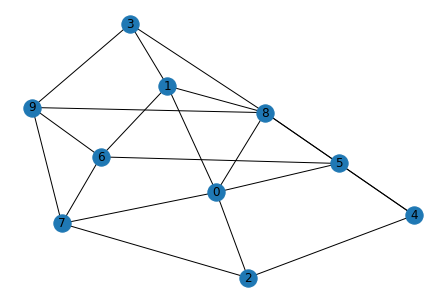

In [42]:
nx.draw(G, with_labels=True) 

In [48]:
#Degree of each node (d * k must be even)
d = 3

In [51]:
R = nx.random_regular_graph(d,k)

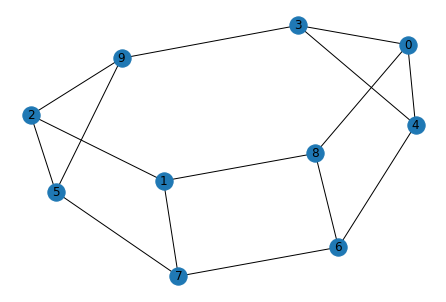

In [52]:
nx.draw(R, with_labels = True)

In [59]:
random.uniform(0,1)

0.15477788882128196

In [63]:
np.random.randint(1,k-1)

4

In [66]:
list(G[2])

[0, 4, 7]

In [69]:
s = 2

### Breath first search

In [76]:
#Breath first search
level = {s : 0}
parent = {s : None}
i = 0
frontier = [s]
while frontier:
    next_node = []
    for u in frontier:
        for v in list(G[u]):
            if v not in level:
                level[v] = i
                parent[v] = u
                next_node.append(v)
    frontier = next_node
    i += 1

In [80]:
len((list(level))) == k

True

### First Method

In [115]:
#Adjacency matrix
A = nx.to_numpy_matrix(G)

In [116]:
A

matrix([[0., 1., 1., 0., 0., 1., 0., 1., 1., 0.],
        [1., 0., 0., 1., 0., 0., 1., 0., 1., 0.],
        [1., 0., 0., 0., 1., 0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 1., 1.],
        [0., 0., 1., 0., 0., 1., 0., 0., 1., 0.],
        [1., 0., 0., 0., 1., 0., 1., 0., 1., 0.],
        [0., 1., 0., 0., 0., 1., 0., 1., 0., 1.],
        [1., 0., 1., 0., 0., 0., 1., 0., 0., 1.],
        [1., 1., 0., 1., 1., 1., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0., 0., 1., 1., 1., 0.]])

In [94]:
matrix_power(A,2)

matrix([[5., 1., 1., 2., 3., 1., 3., 1., 2., 2.],
        [1., 4., 1., 1., 1., 3., 0., 2., 2., 3.],
        [1., 1., 3., 0., 0., 2., 1., 1., 2., 1.],
        [2., 1., 0., 3., 1., 1., 2., 1., 2., 1.],
        [3., 1., 0., 1., 3., 1., 1., 1., 1., 1.],
        [1., 3., 2., 1., 1., 4., 0., 2., 2., 2.],
        [3., 0., 1., 2., 1., 0., 4., 1., 3., 1.],
        [1., 2., 1., 1., 1., 2., 1., 4., 2., 1.],
        [2., 2., 2., 2., 1., 2., 3., 2., 6., 1.],
        [2., 3., 1., 1., 1., 2., 1., 1., 1., 4.]])

In [107]:
k

10

In [123]:
B = np.zeros((k,k))
B

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [124]:
for i in range(k):
    B = B + matrix_power(A, i)


In [127]:
#Checking condition for irriducibility
np.all(B > 0)

True

### Second Method

In [134]:
#Defining Laplacian
from scipy.sparse.csgraph import laplacian

In [135]:
L = laplacian(A)

In [136]:
L

array([[ 5., -1., -1., -0., -0., -1., -0., -1., -1., -0.],
       [-1.,  4., -0., -1., -0., -0., -1., -0., -1., -0.],
       [-1., -0.,  3., -0., -1., -0., -0., -1., -0., -0.],
       [-0., -1., -0.,  3., -0., -0., -0., -0., -1., -1.],
       [-0., -0., -1., -0.,  3., -1., -0., -0., -1., -0.],
       [-1., -0., -0., -0., -1.,  4., -1., -0., -1., -0.],
       [-0., -1., -0., -0., -0., -1.,  4., -1., -0., -1.],
       [-1., -0., -1., -0., -0., -0., -1.,  4., -0., -1.],
       [-1., -1., -0., -1., -1., -1., -0., -0.,  6., -1.],
       [-0., -0., -0., -1., -0., -0., -1., -1., -1.,  4.]])

In [137]:
eingevalues, eingevectors = LA.eig(L)

In [138]:
np.sort(eingevalues)

array([1.77635684e-15, 1.72681941e+00, 2.51015666e+00, 3.00000000e+00,
       3.50772645e+00, 4.50632189e+00, 5.00000000e+00, 5.43546244e+00,
       6.90821561e+00, 7.40529753e+00])